#                                        Restaurant Rating Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset


In [2]:
df = pd.read_csv("zomato.csv")
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


# Data Analysis

In [3]:
df.head() # prints the first 5 rows of a DataFrame

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.columns # give name of all the columns in the dataset 

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
df.shape # give number of rows and columns

(51717, 17)

- there are total 51717 samples with 17 features.

In [6]:
df.info() # Looking at the information about the dataset, datatypes of the coresponding columns and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [7]:
df.dtypes #datatypes of column

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

# Data Cleaning or EDA (Exploratory Data Analysis)
##### Data Cleaning:
1. Deleting redundant columns.
2. Renaming the columns.
3. Dropping duplicates.
4. Cleaning individual columns.
5. Remove the NaN values from the dataset
6. Some Transformations

##### Deleting Unnnecessary Columns

In [8]:
#Dropping the column "dish_liked", "phone", "url", 'reviews_list','address','menu_item' and saving the new dataset as "data"

df=df.drop(['url','phone','reviews_list','address','menu_item', 'dish_liked'],axis=1) 
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


##### Null Value Analysis


In [9]:
# Calculate percentage of null values in each column
null_percentage = (df.isnull().sum() / len(df)) * 100

# Display null percentage
print("Null Value Percentage:")
print(null_percentage)

Null Value Percentage:
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
location                        0.040606
rest_type                       0.438927
cuisines                        0.087012
approx_cost(for two people)     0.669026
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64


In [10]:
df.isnull().sum() # give number of missing values variables have.

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

- we can clearly see that in the  '__rate__','__location__','__rest_type__', '__cuisines__' and '__approx_cost(for two people)__' there are null values .So, firstly we have to handle the missing values.

In [11]:
# to get name of columns with null values more than 0

[features for features in df.columns if df[features].isnull().sum()>0] 

['rate', 'location', 'rest_type', 'cuisines', 'approx_cost(for two people)']

##### Remove the NaN values from the dataset

In [12]:
data = df.copy(deep = True)
#data['rate'] = data['rate'].replace(0,np.NaN)
print(data.isnull().sum())

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
listed_in(city)                   0
dtype: int64


##### Handling the 'Rating' column

In [13]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

- here rating column also string type. we have to convert them into numeric type. we have to remove the '/5' from given values. there is 'NEW' and - value which makes no sense. So, we have to remove that value.

In [14]:
data=data.loc[data.rate != 'NEW'] # geting rid of 'NEW'

In [15]:
data= data.loc[data.rate != '-']

In [16]:
data['rate'] = data['rate'].dropna().apply(lambda x: float(x.split('/')[0]) if (len(x)>3) else np.nan)

In [17]:
data['rate'].fillna(data['rate'].mean(),inplace=True)
data['rate'].unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       2.9       , 3.5       , 3.70044882, 2.6       , 3.4       ,
       4.5       , 2.5       , 2.7       , 4.7       , 2.4       ,
       2.2       , 2.3       , 4.8       , 4.9       , 2.1       ,
       2.        , 1.8       ])

In [18]:
# Drop rows with any null values from the DataFrame 'data' and modify it in place
data.dropna(inplace=True) 

data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

- Now there is no null value

##### Changing The Columns Names

In [19]:
data = data.rename(columns={'name':'Name',
        'address':'Address',
        'rate':"Rating",
        'cuisines':"Cuisines", 
        'approx_cost(for two people)':"Cost", 
        'listed_in(type)':"Type",
        'listed_in(city)':"City"})
data.columns

Index(['Name', 'online_order', 'book_table', 'Rating', 'votes', 'location',
       'rest_type', 'Cuisines', 'Cost', 'Type', 'City'],
      dtype='object')

##### Cleaning the "cost" column

In [20]:
data['Cost'].unique() # gives unique values in cost column

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '80', '50', '190', '1,700', '180', '1,350', '2,200',
       '1,400', '2,000', '1,800', '1,900', '330', '2,500', '2,100',
       '3,000', '2,800', '3,400', '40', '1,250', '3,500', '4,000',
       '2,400', '2,600', '120', '1,450', '469', '70', '3,200', '60',
       '240', '6,000', '1,050', '2,300', '4,100', '5,000', '3,700',
       '1,650', '2,700', '4,500', '140', '360'], dtype=object)

- here we can see that data point is string type and some values like 1,200, ,2,500, 5,000 6,000 etc have commas(,). we have  to remove that ',' from the values and we have convert them into numeric type.

In [21]:
# Remove commas and spaces from the 'Cost' column and then convert to float
data['Cost'] = data['Cost'].str.replace(",", "").str.replace(" ", "").astype(float)

In [22]:
data['Cost'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199., 1100., 1600.,  230.,  130.,
         80.,   50.,  190., 1700.,  180., 1350., 2200., 1400., 2000.,
       1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,   40.,
       1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,   70.,
       3200.,   60.,  240., 6000., 1050., 2300., 4100., 5000., 3700.,
       1650., 2700., 4500.,  140.,  360.])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48878 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          48878 non-null  object 
 1   online_order  48878 non-null  object 
 2   book_table    48878 non-null  object 
 3   Rating        48878 non-null  float64
 4   votes         48878 non-null  int64  
 5   location      48878 non-null  object 
 6   rest_type     48878 non-null  object 
 7   Cuisines      48878 non-null  object 
 8   Cost          48878 non-null  float64
 9   Type          48878 non-null  object 
 10  City          48878 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.5+ MB


- Now sucessfully we converted the values into numeric type

In [24]:
data.online_order[data.online_order == 'Yes'] = 1 
data.online_order[data.online_order == 'No'] = 0

data.book_table[data.book_table == 'Yes'] = 1 
data.book_table[data.book_table == 'No'] = 0

data.online_order = pd.to_numeric(data.online_order)
data.book_table = pd.to_numeric(data.book_table)

##### Removing the Duplicates

In [25]:
# Calculate the number of duplicated rows in the DataFrame 'data' and return the sum
data.duplicated().sum() 

93

In [26]:
data.drop_duplicates(inplace=True)

In [27]:
data.shape

(48785, 11)

# Data  Visualization

##### Most famous restaurant chains in banaglore

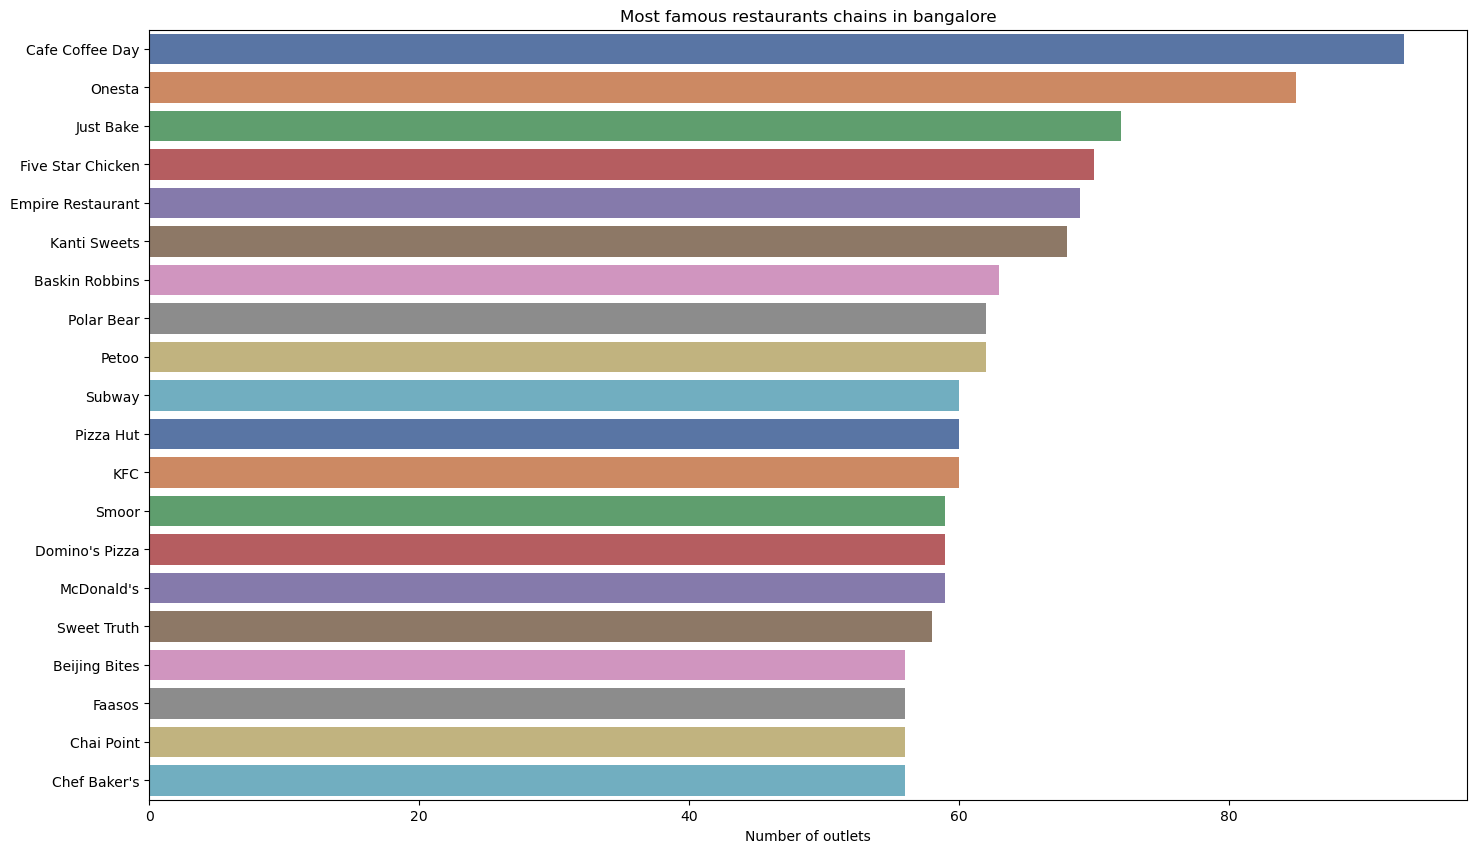

In [28]:
plt.figure(figsize = (17,10))
chains = data['Name'].value_counts()[:20]
sns.barplot(x = chains, y= chains.index,  palette= 'deep')
plt.title('Most famous restaurants chains in bangalore')
plt.xlabel('Number of outlets')
plt.show()

Insights:

- __'Onesta'__, __'Empire Restaurant'__ & __'Cafe Coffee Day'__  are the most famous restaurant in bangalore.

##### Rating Distribution

Text(0.5, 1.0, 'Rating Distribution')

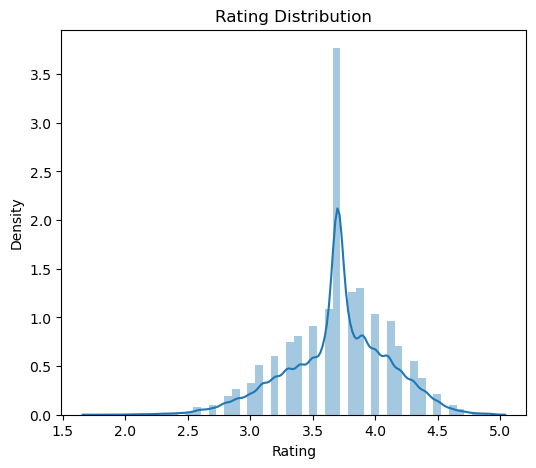

In [29]:
plt.figure(figsize = (6,5))
sns.distplot(data["Rating"])
plt.title('Rating Distribution')

__Insight:__

- We can infer from above that most of the ratings are within 3.5 and 4.0

##### Restaurant Types

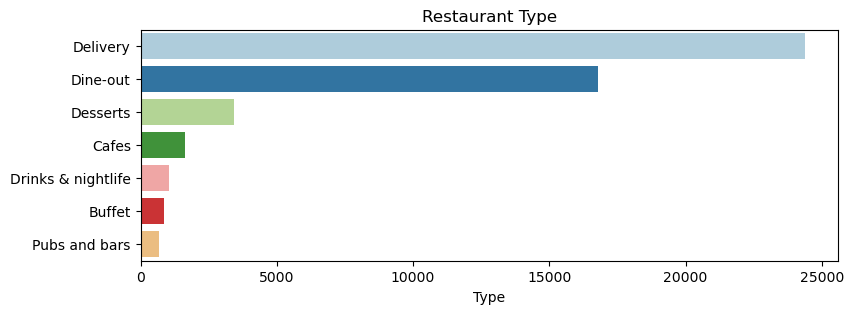

In [30]:
plt.figure(figsize = (9,3))
t = data['Type'].value_counts()
sns.barplot(y = t.index ,x = t, palette = 'Paired')
plt.title('Restaurant Type')
plt.show()

__Insight:__

- 'Delivery', 'Dine-out', 'Desserts' are the most common types of  restaurant.
- "Pubs and bars ","Buffet", 'Drinks&nightlife' are the least common. 

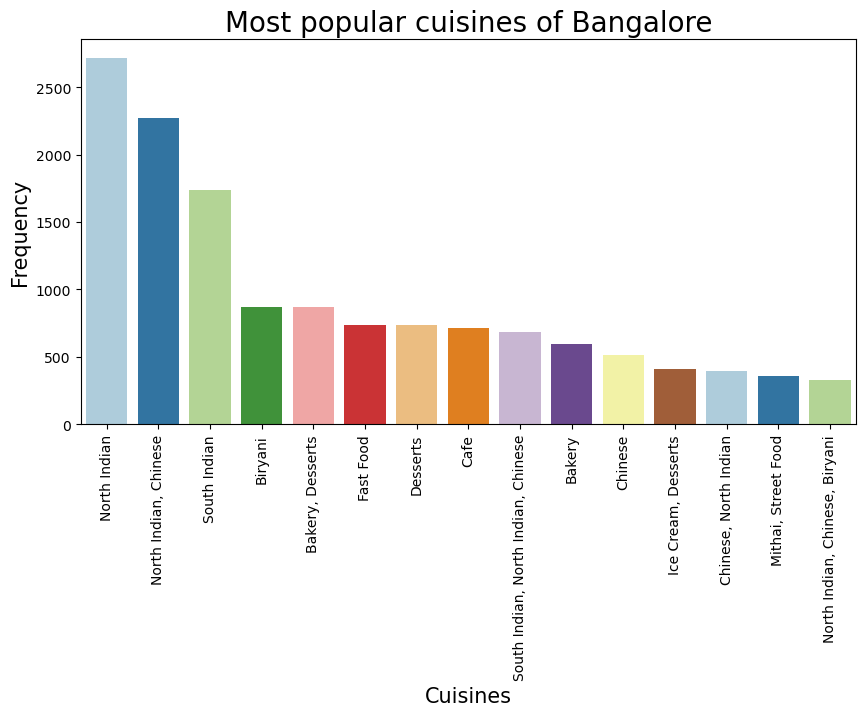

In [31]:
v = data['Cuisines'].value_counts()[:15]
plt.figure(figsize = (10,5))

ax  = sns.barplot(x = v.index, y = v, palette = 'Paired')

plt.title('Most popular cuisines of Bangalore', fontsize = 20)
plt.xlabel('Cuisines', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(rotation =90)
plt.show()

Insights:

- Here from above we can see that __'North Indian Cuisines'__ are most famous in Bangalore restaurants.

#####  Distribution of Cost of Food for two People


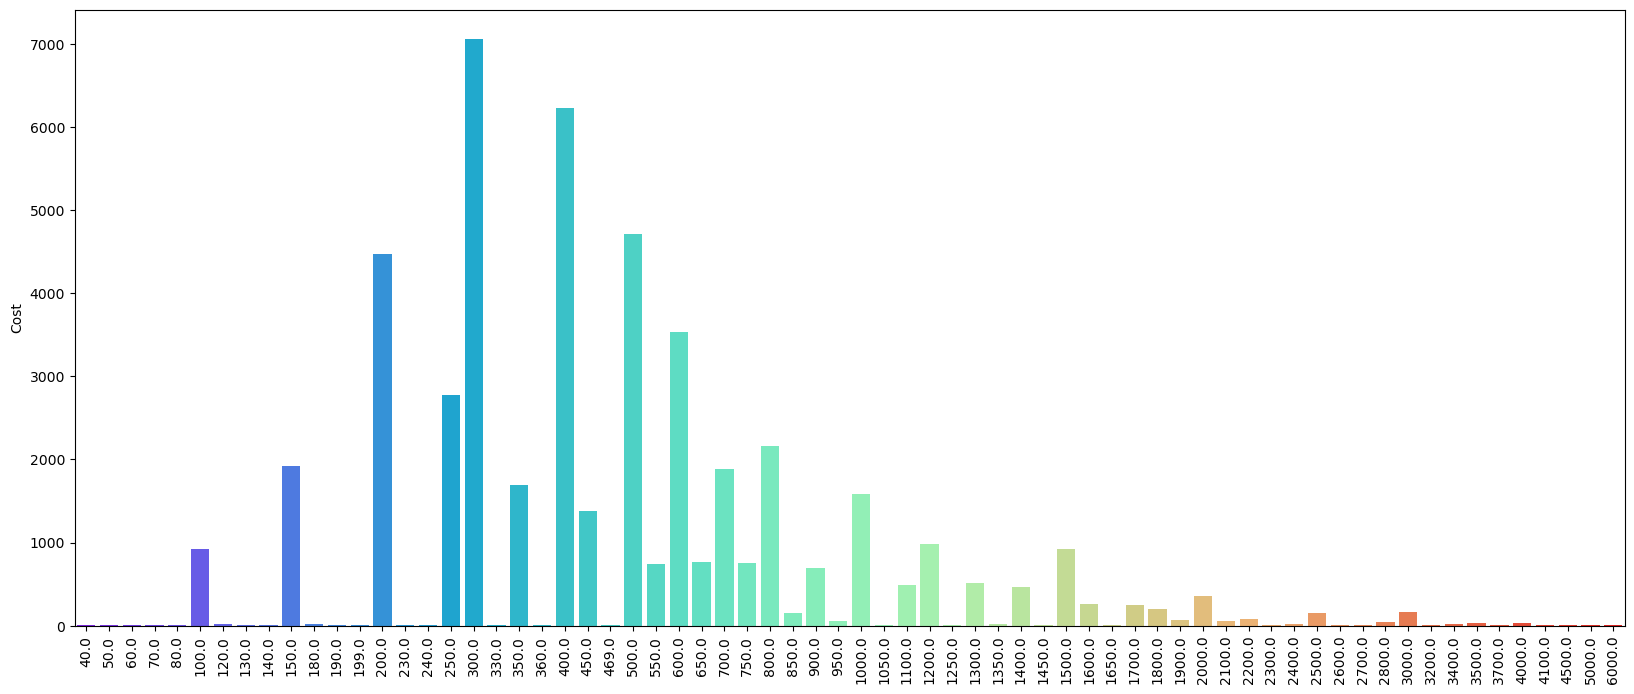

In [32]:
#contains the approximate cost of meal for two people
v = data['Cost'].value_counts()
plt.figure(figsize = (20,8))

sns.barplot(x = v.index, y = v, palette = 'rainbow')
plt.xticks(rotation=90)
plt.show()

# Data Preprocessing

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.Type = le.fit_transform(data.Type)
data.rest_type = le.fit_transform(data.rest_type)
data.Cuisines = le.fit_transform(data.Cuisines)
data.book_table = le.fit_transform(data.book_table)
data.location = le.fit_transform(data.location)
data.City = le.fit_transform(data.City)

In [42]:
data.head(n=2)

,Name,online_order,book_table,Rating,votes,location,rest_type,Cuisines,Cost,Type,City
0,Jalsa,1,1,4.1,775,1,27,2075,800.0,0,1
1,Spice Elephant,1,0,4.1,787,1,27,917,800.0,0,1


In [43]:
my_data=data.iloc[:,[1,2,3,4,5,6,7,8,9,10]]
my_data.to_csv('display.csv')
my_data.head()

,online_order,book_table,Rating,votes,location,rest_type,Cuisines,Cost,Type,City
0,1,1,4.1,775,1,27,2075,800.0,0,1
1,1,0,4.1,787,1,27,917,800.0,0,1
2,1,0,3.8,918,1,22,738,800.0,0,1
3,0,0,3.7,88,1,78,2451,300.0,0,1
4,0,0,3.8,166,4,27,2103,600.0,0,1


# Data Modeling

In [44]:
x = data.iloc[:,[1,2,4,5,6,7,9,10]]
y = data['Rating']

##### Splitting data into train and test set

In [45]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=10)

In [46]:
xtrain

,online_order,book_table,votes,location,rest_type,Cuisines,Type,City
9171,1,0,421,3,27,945,2,0
44640,0,0,18,60,78,506,4,24
38928,1,0,227,52,78,526,4,20
23331,0,0,5,29,78,2263,4,12
39337,1,1,1239,81,28,213,5,20
...,...,...,...,...,...,...,...,...
42581,1,0,84,27,40,1452,2,21
29890,1,0,10,16,78,2364,2,17
31149,0,0,34,45,65,1777,4,17
42583,1,0,43,27,78,1749,2,21


In [47]:
ytrain

9171     4.2
44640    3.6
38928    4.4
23331    3.3
39337    4.5
        ... 
42581    3.9
29890    3.4
31149    3.7
42583    3.2
18930    3.2
Name: Rating, Length: 34149, dtype: float64

#### Linear Regression


In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)

#predict the test set
ypred = lr.predict(xtest)

## Evaluate the model
from sklearn.metrics import r2_score
print(r2_score(ytest, ypred))

0.2708214502334336


#### Decision Tree Regression

In [49]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(xtrain,ytrain)

#predict the test set
ypred = dtr.predict(xtest)

## Evaluate the model
from sklearn.metrics import r2_score
print(r2_score(ytest, ypred))


0.805237877279019


#### Random Forest Regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(xtrain,ytrain)

#predict the test set
ypred = model.predict(xtest)

## Evaluate the model
from sklearn.metrics import r2_score
print(r2_score(ytest, ypred))

0.8816134772990369


In [51]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ypred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))

Mean Absolute Error: 0.06696374487553904
Mean Squared Error: 0.019190823640285692
Root Mean Squared Error: 0.1385309483122298


For the modeling part, we used LinearRegression, DecisionTree Regressor, RandomForest Regressor. From all these models RandomForestRegressor perform well as compared to the other models. So it is selected for model creation.

In [52]:
import joblib 

joblib.dump(model,'model.pkl')

['model.pkl']